## Unlocking Job Insights in Full Stack through Web Scraping across Nordic & German Markets  
### 🌐📊 #FullstackJobs #MarketResearch

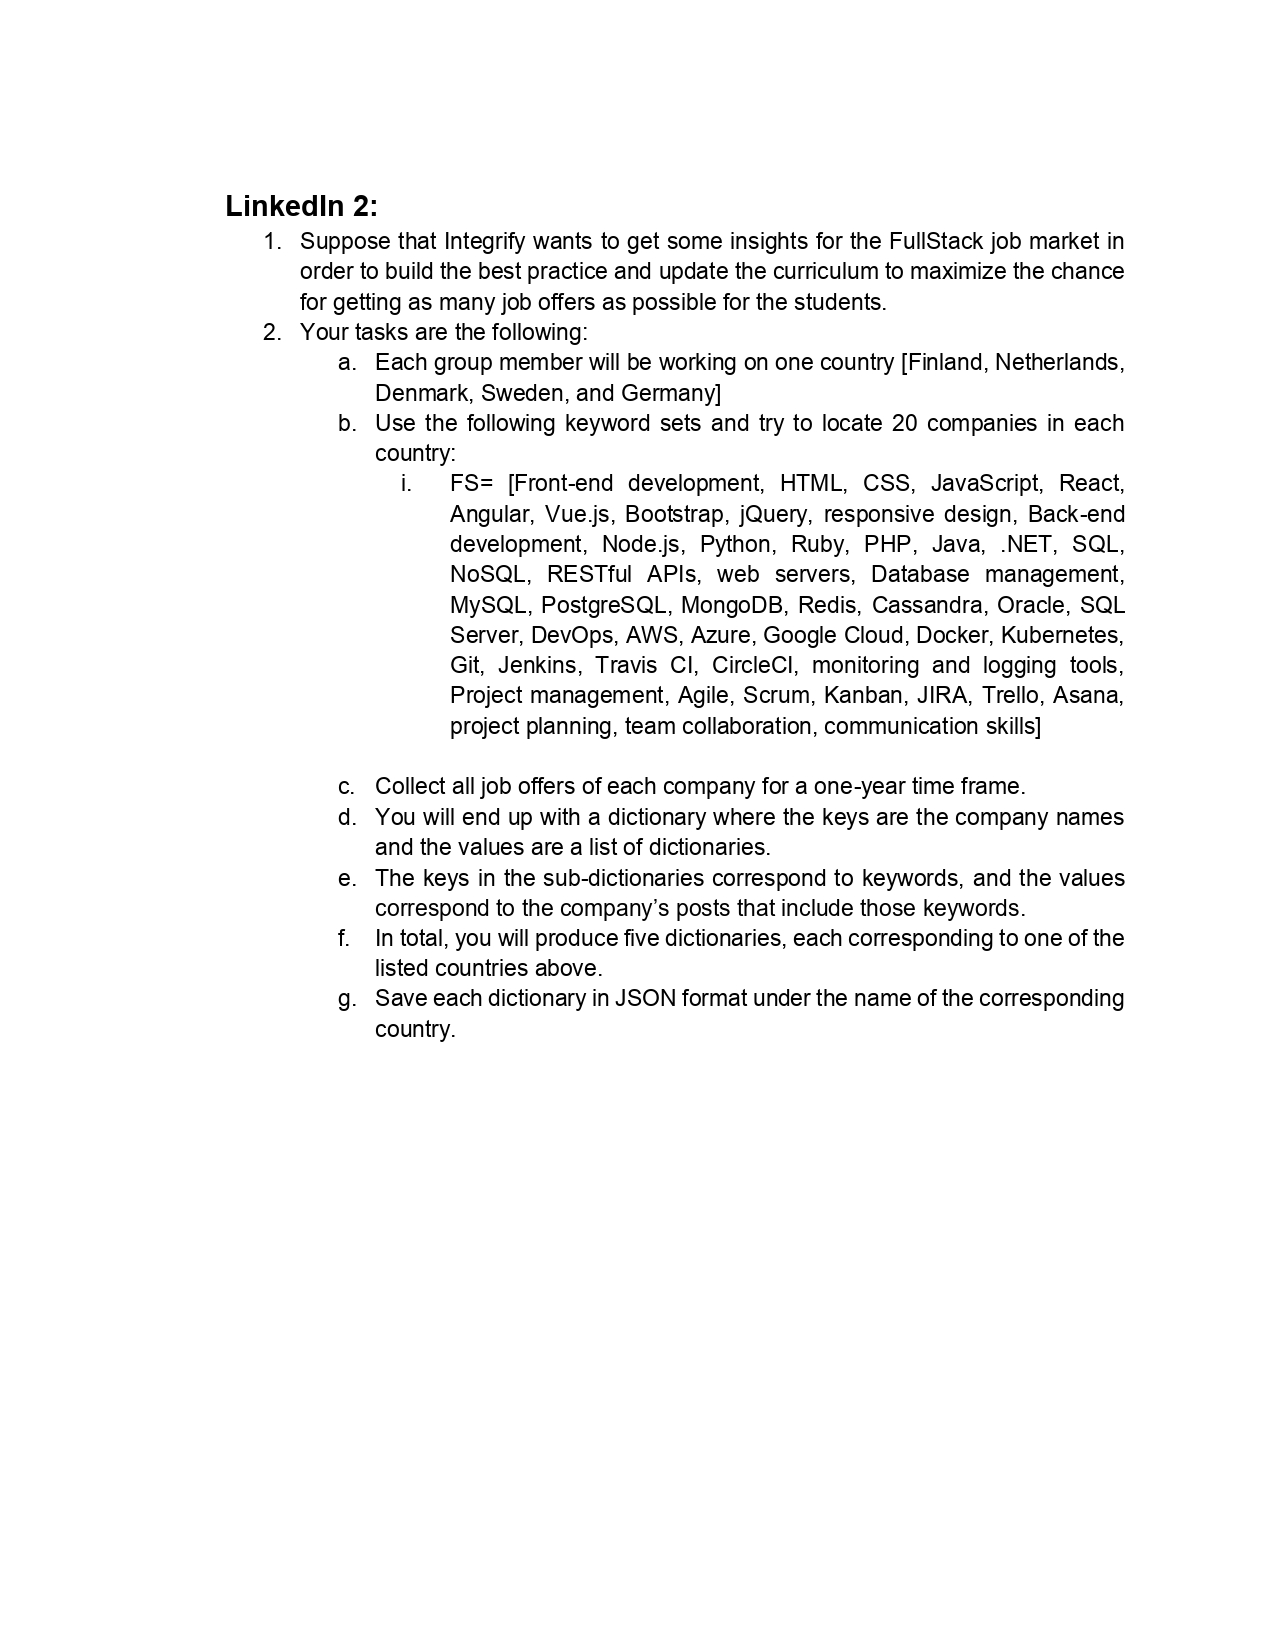

In [2]:
import requests
from bs4 import BeautifulSoup
import json


class LinkedinScraper:    

    # Concatenate the two lists
    keywords = ['Front-end development', 'HTML', 'CSS', 'JavaScript', 'React', 'Angular', 'Vue.js', 'Bootstrap', 'jQuery', 'responsive design',      'Back-end development', 'Node.js', 'Python', 'Ruby', 'PHP', 'Java', '.NET', 'SQL', 'NoSQL', 'RESTful APIs', 'web servers',      'Database management', 'MySQL', 'PostgreSQL', 'MongoDB', 'Redis', 'Cassandra', 'Oracle', 'SQL Server',      'DevOps', 'AWS', 'Azure', 'Google Cloud', 'Docker', 'Kubernetes', 'Git', 'Jenkins', 'Travis CI', 'CircleCI', 'monitoring and logging tools',      'Project management', 'Agile', 'Scrum', 'Kanban', 'JIRA', 'Trello', 'Asana', 'project planning', 'team collaboration', 'communication skills']

    
    def __init__(self, country_name, geoId, companies):
        self.country_name = country_name
        self.geoId = geoId
        self.companies = companies
        self.search_url_pattern = 'https://www.linkedin.com/jobs/search/?currentJobId={}&distance=25&geoId={}&keywords={}&refresh=true&start={}'

    
    
    def scrape_jobs(self, output_file_path):
        start_index = 0
        jobs_per_page = 25
        total_jobs_downloaded = 0        
        
        
        # Iterate over each company and search for matching jobs
        with open(output_file_path, 'w', encoding='utf-8') as json_file:
            for i, company in enumerate(self.companies):
                print(f"Company {i+1}: {company}")
                jobs_downloaded = 0
                # Iterate until no matching jobs are found
                while True:
                    # Construct the search URL
                    search_url = self.search_url_pattern.format(start_index, self.geoId, company, start_index)

                    # Send a GET request to the search URL
                    response = requests.get(search_url)

                    # Parse the HTML content of the page using BeautifulSoup
                    soup = BeautifulSoup(response.content, 'html.parser')

                    # Find all the job posting URLs on the page
                    job_urls = [a['href'] for a in soup.find_all('a', href=True) if '/jobs/view/' in a['href']]

                    # If no matching jobs are found, break the loop
                    if len(job_urls) == 0:
                        break

                    # Iterate over each job URL and extract the job information
                    for job_url in job_urls:               

                        # Send a GET request to the job URL

                        response = requests.get(job_url)

                        # Parse the HTML content of the page using BeautifulSoup
                        soup = BeautifulSoup(response.content, 'html.parser')

                        # Find the job title and company name
                        title = soup.find('h1', class_='topcard__title')
                        if title is not None:
                            title = title.text.strip()
                        else:
                            continue
                        company_name = soup.find('a', class_='topcard__org-name-link')
                        if company_name is not None:
                            company_name = company_name.text.strip()
                        else:
                            continue

                        # Find the div tag that contains the job description
                        description_div = soup.find('div', class_='description__text')

                        if description_div is not None:
                            # Extract the job description text
                            job_description = description_div.get_text().strip()
                            job_description = job_description.replace('Show more', '').replace('Show less', '')

                            # Remove any extra spaces from the job description
                            job_description = ' '.join(job_description.split())


                            found_keywords = [keyword for keyword in self.keywords if keyword in job_description]                      

                            if found_keywords:
                                job_info = {
                                    'Country_name': self.country_name,
                                    'company_name': company_name,
                                    'keywords': found_keywords,
                                    'description': job_description 
                                } 
                                
                                with open(output_file_path, 'a', encoding='utf-8') as json_file:
                                    json.dump(job_info, json_file, ensure_ascii=False)
                                    json_file.write('\n')
                                
                                jobs_downloaded += 1
                                total_jobs_downloaded += 1                       
                        
                    
                                print(f"         Job {jobs_downloaded}: {title} downloaded!") 
                            
                
                if jobs_downloaded == 0:
                    print(f"         No jobs found for {company}")  
                            
                        
        print()
        print("Total {} jobs downloaded!".format(total_jobs_downloaded ))                                  


### Scraping  full stack job data for Finland

In [2]:
country_name= "Finland"
geoId="100456013"
companies = ['Oliver Parks', 'Trimble Inc.', 'Knowit', 'Eficode', 'Wolt', 'Nigel Frank International', 'Tietoevry', 'Nortal', 'Silo AI', 'Solita', 'CGI', 'Accenture', 'Wärtsilä', 'F-Secure', 'Neste', 'Nordea', 'Aiven', 'Unikie', 'Smartly.io', 'Nokia', 'Vaisala', 'Futurice', 'Elisa', 'Taiste', 'AlphaSense', 'Gofore', 'Canonical', 'Vincit']

print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("FS_jobs_finland.json")

Country:  Finland

Company 1: Oliver Parks
         Job 1: Data Specialist downloaded!
         Job 2: Technical Lead downloaded!
         Job 3: Fullstack developer downloaded!
         Job 4: Fullstack developer downloaded!
         Job 5: Fullstack developer downloaded!
         Job 6: Cloud Architect downloaded!
         Job 7: Software developer downloaded!
         Job 8: Back End Developer downloaded!
         Job 9: Software developer downloaded!
         Job 10: Software developer downloaded!
         Job 11: Java Developer downloaded!
         Job 12: Hands-on Lead Architect role in Helsinki region downloaded!
         Job 13: Data Specialist downloaded!
         Job 14: Technical Lead downloaded!
         Job 15: Fullstack developer downloaded!
         Job 16: Cloud Architect downloaded!
         Job 17: Software developer downloaded!
         Job 18: Back End Developer downloaded!
         Job 19: Software developer downloaded!
         Job 20: Software developer downloade

### A JSON file containing scraped data for Finland might look like this:

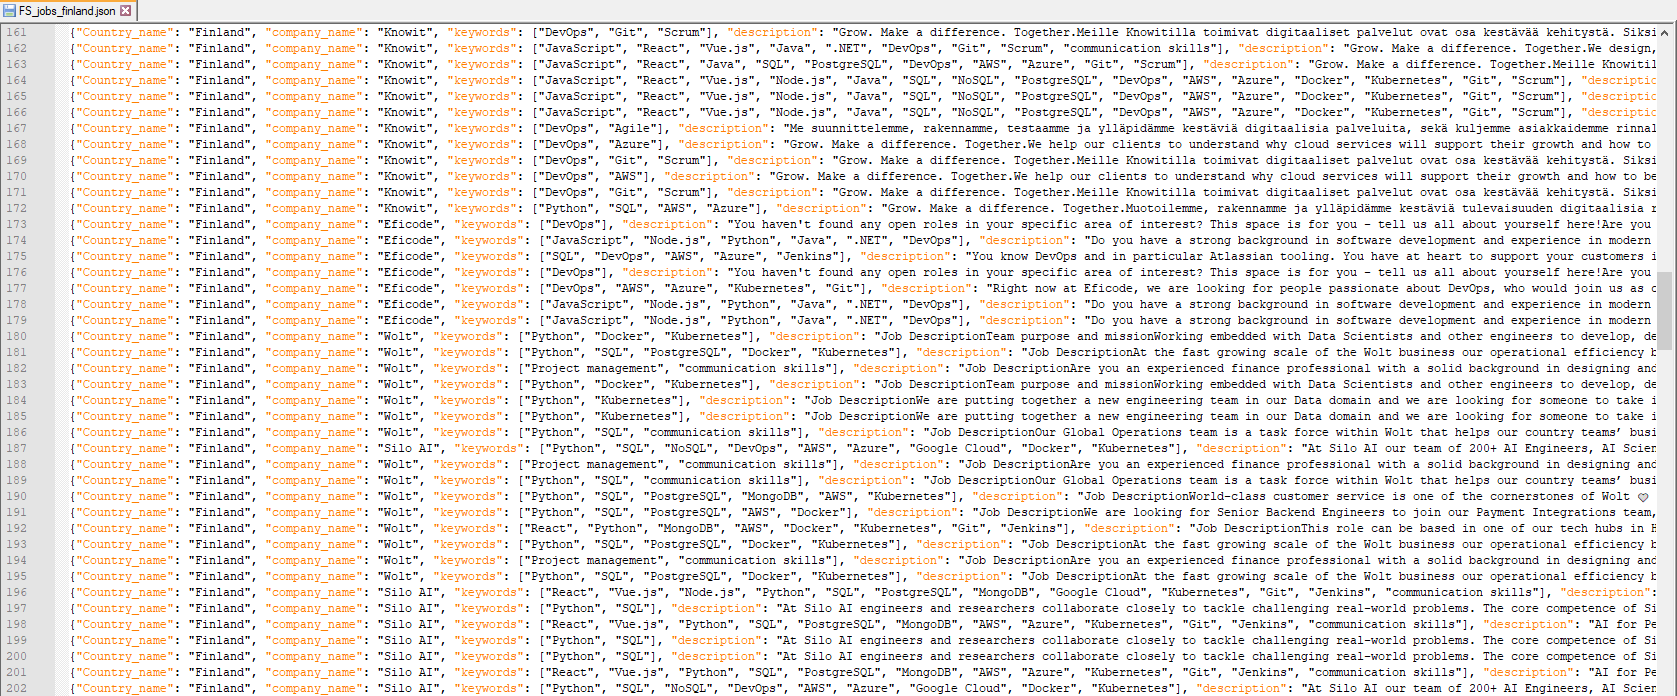

###  Scraping  full stack job data for Netherlands

In [ ]:
country_name= "Netherlands"
geoId="102890719"
companies =['NAVARA', 'Buro5 Recruitment', 'StarApple', 'CGI Nederland', 'Good Company', 'typ', 'StackBird', 'DEXTER', ' Sparkling People', 'Cooder', 'TNO', 'Ministerie van Defensie', 'ALTEN Nederland', 'Kadaster', 'Opus Recruitment Solutions', 'Capgemini', 'IBM', 'Amazon', 'Google', 'Microsoft', 'Agoda', 'Qualcomm', 'Eindhoven University of Technology', 'Trinamics', 'Cegeka', 'Barrington James', 'CodeGuild', 'Creative Fabrica', 'Centric', 'Leap29', 'Picnic Technologies', 'Albert Heijn', 'Frontend Professionals', 'Orange Quarter', 'HiQ', 'Darwin Recruitment']


print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("FS_jobs_netherlands.json")

Country:  Netherlands

Company 1: NAVARA
         Job 1: Data Scientist | Navara Enterprise Analytics B.V. downloaded!
         Job 2: Data Science Consultant | Navara downloaded!
         Job 3: Data Engineer | Navara Enterprise Analytics B.V. downloaded!
         Job 4: Mobile Engineer | Navara downloaded!
         Job 5: Junior Frontend Developer in Rotterdam downloaded!
         Job 6: React Native Developer | Navara downloaded!
         Job 7: Full-stack Software Engineer downloaded!
         Job 8: Senior Full-stack Software Engineer downloaded!
         Job 9: Medior Frontend Developer in Rotterdam downloaded!
         Job 10: Senior Frontend Developer in Rotterdam downloaded!
         Job 11: Senior Tech Lead in Rotterdam downloaded!
         Job 12: Data Science Consultant | Navara downloaded!
         Job 13: Mobile Engineer | Navara downloaded!
         Job 14: Junior Frontend Developer in Rotterdam downloaded!
         Job 15: Frontend Engineer | Navara downloaded!
        

### A JSON file containing scraped data for Netherlands might look like this:

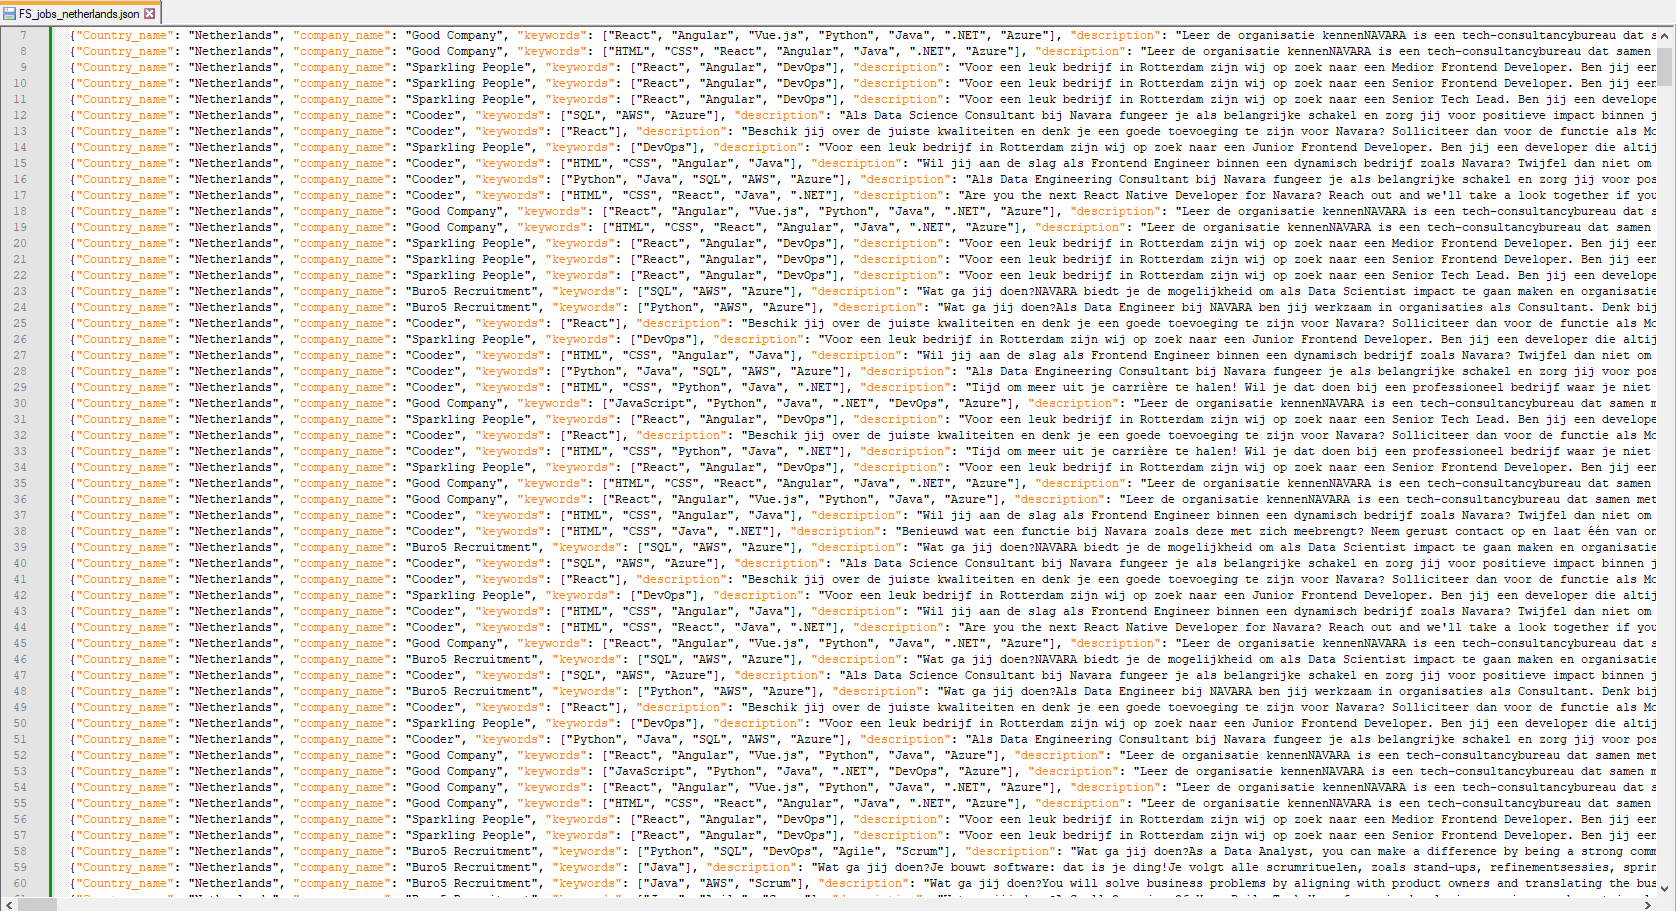

### Scraping  full stack job for Denmark

In [ ]:
country_name= "Denmark"
geoId="104514075"
companies = ['Trustpilot', 'BESTSELLER', 'Canonical', 'HCLTech', 'Randstad Danmark', 'the LEGO Group', 'Mover Systems', 'Netcompany', 'Schibsted', 'Danfoss', 'Nigel Frank International', 'Tryg', 'Too Good To Go', 'Mastercard', 'Maersk', 'Danske Bank', 'William Demant Holding', 'Nets', 'Ambu A/S', 'NNIT', 'Bang & Olufsen', 'DFDS', 'FLSmidth', 'Workday', 'Boston Consulting Group (BCG)', 'Antler', 'DTU - Technical University of Denmark', 'ATLANT 3D', 'Silo AI', 'ROCKWOOL Group', 'Corti', 'Accenture Nordics', 'TELUS International AI Data Solutions', 'Appen', 'IT-Universitetet i København', 'Capgemini', 'TELUS International', 'Mindway AI']


print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("FS_jobs_denmark.json")

Country:  Denmark

Company 1: Trustpilot
         Job 1: Engineering Manager - Business Systems downloaded!
         Job 2: Software Engineering Lead - Marketing downloaded!
         Job 3: Business Development Manager, FinTech downloaded!
         Job 4: Engineering Manager - Business Systems downloaded!
         Job 5: Engineering Manager - Business Systems downloaded!
         Job 6: Software Engineering Lead - Marketing downloaded!
         Job 7: Engineering Manager - Business Systems downloaded!
         Job 8: Software Engineering Lead - Marketing downloaded!
         Job 9: Business Development Manager, FinTech downloaded!
Company 2: BESTSELLER
         Job 1: User Experience Intern downloaded!
         Job 2: Communication Student Worker downloaded!
         Job 3: Backend Developer downloaded!
         Job 4: Backend Developer - Brand Tech Department downloaded!
         Job 5: Server Infrastructure Specialist downloaded!
         Job 6: Student Worker for Network Service Aut

### A JSON file containing scraped data for Denmark might look like this:

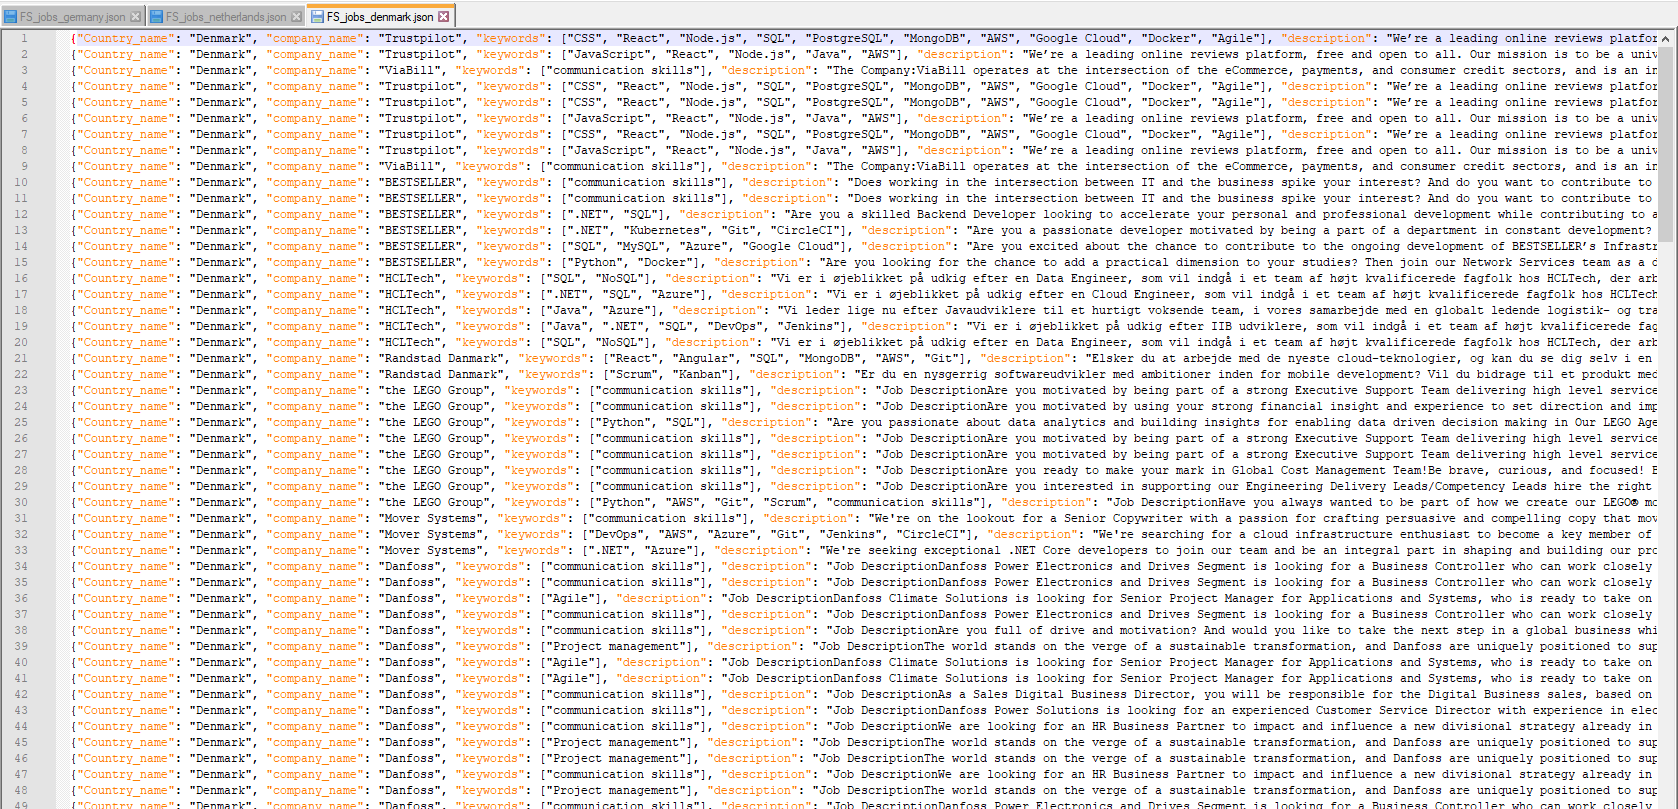


### Scraping full stack job data for Sweden

In [ ]:
country_name= "Sweden"
geoId="105117694"
companies = ['SimpleSign', 'InterEx Group', 'Iver Sverige', 'HCLTech', 'Fortnox', 'Orbis', 'Lynk & Co', 'Swedbank','Computer Futures', 'HiQ', 'Canonical', 'Nexer Group','Enfo', 'tretton37', 'Tietoevry', 'Fortnox', 'HiQ', 'Boeing', 'Bluestep Bank', 'Telavox', 'Klarna', 'Scania', 'Volvo Group', 'Nordea', 'Handelsbanken', 'Swedbank', 'Northvolt', 'King', 'TDA Creative', 'AFRY', 'CGI',  'IBM', 'Amazon', 'Google', 'Microsoft']

print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("FS_jobs_sweden.json")

Country:  Sweden

Company 1: SimpleSign
         Job 1: Backend-utvecklare downloaded!
         Job 2: Fullstack Engineer downloaded!
         Job 3: CTO downloaded!
         Job 4: Full Stack Engineer downloaded!
         Job 5: Backend-utvecklare downloaded!
         Job 6: Fullstack Engineer downloaded!
         Job 7: CTO downloaded!
         Job 8: Full Stack Engineer downloaded!
         Job 9: Back End-utvecklare downloaded!
         Job 10: Backend-utvecklare downloaded!
         Job 11: CTO downloaded!
         Job 12: Backend-utvecklare downloaded!
         Job 13: Fullstack Engineer downloaded!
         Job 14: Backend-utvecklare downloaded!
         Job 15: Fullstack Engineer downloaded!
         Job 16: CTO downloaded!
         Job 17: Backend-utvecklare downloaded!
         Job 18: Fullstack Engineer downloaded!
         Job 19: CTO downloaded!
         Job 20: Full Stack Engineer downloaded!
         Job 21: Back End-utvecklare downloaded!
Company 2: InterEx Group
      

### A JSON file containing scraped data for Sweden might look like this:

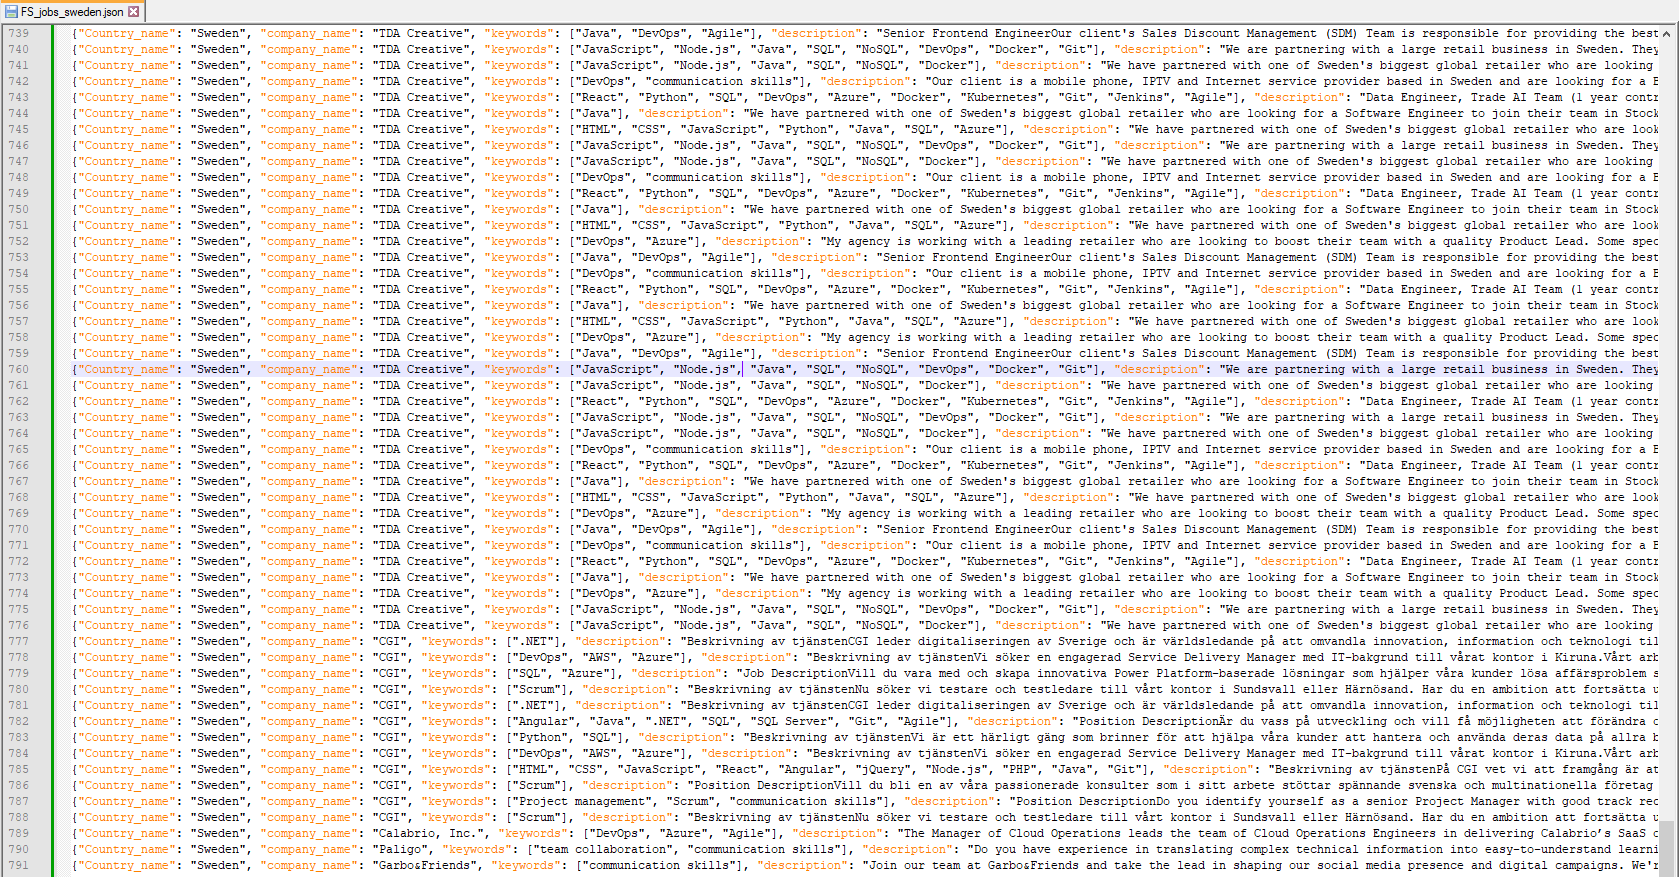

### Scraping full stack job data for Germany

In [ ]:
country_name= "Germany"
geoId="101282230"
companies = ['OBI next', 'Koelnmesse GmbH', 'JustWatch', 'Atos', 'ROSEN', 'GR4', 'Safety io', 'Expleo Group', 'JustWatch', 'FERCHAU', 'Nordex Group', 'XIBIX Solutions GmbH', 'Raisin', 'valantic', '360T', 'Vinted', 'Sopra Steria', 'Allianz', 'Bayer', 'Lufthansa', 'Munich Re', 'Volkswagen', 'Zalando', 'Delivery Hero', 'Agoda', 'adesso SE', 'BCG Platinion', 'Fraunhofer Karriere', 'sennder']
print("Country: ", country_name)
print()

scraper = LinkedinScraper(country_name, geoId, companies )
scraper.scrape_jobs("FS_jobs_germany.json")

Country:  Germany

Company 1: OBI next
         Job 1: Data Analyst – Web & App (m/w/d) downloaded!
         Job 2: Fullstack Developer (m/w/d) downloaded!
         Job 3: Backend Developer (m/w/d) downloaded!
         Job 4: Security Engineer (m/w/d) downloaded!
         Job 5: (Senior) Software Engineer Java (m/w/d) downloaded!
         Job 6: Junior Cloud Security Specialist / DevSecOps (m/w/d) downloaded!
         Job 7: (Senior) Software Engineer TypeScript (m/w/d) downloaded!
         Job 8: (Senior) Full Stack Software Engineer TypeScript (m/w/d) downloaded!
         Job 9: Data Analyst – Web & App (m/w/d) downloaded!
         Job 10: Fullstack Developer (m/w/d) downloaded!
         Job 11: Security Engineer (m/w/d) downloaded!
         Job 12: Junior Cloud Security Specialist / DevSecOps (m/w/d) downloaded!
         Job 13: (Senior) Software Engineer TypeScript (m/w/d) downloaded!
         Job 14: (Senior) Full Stack Software Engineer TypeScript (m/w/d) downloaded!
         Job

### A JSON file containing scraped data for Germany might look like this:

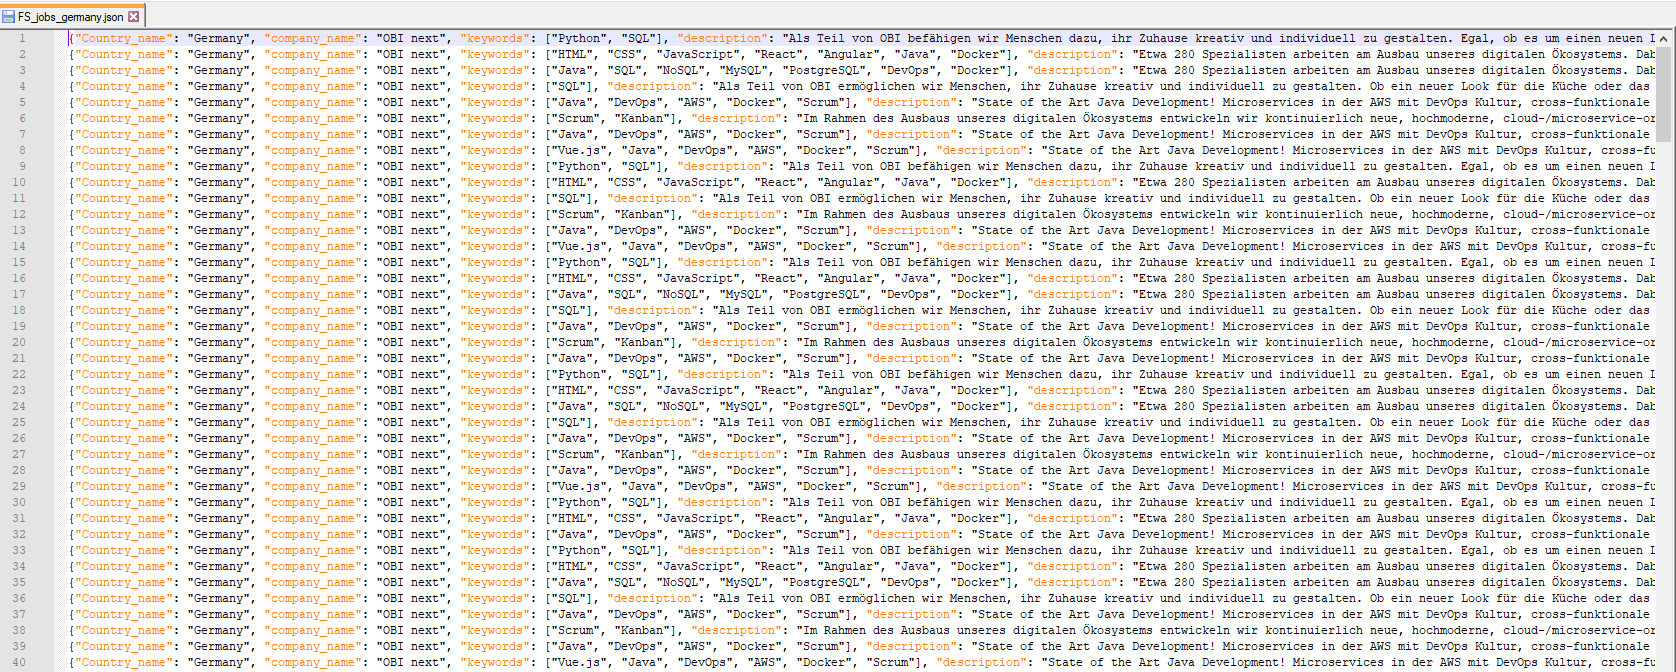